# Sentiment140

In [95]:
dataset = "Sentiment140"

In [96]:
import warnings 
warnings.filterwarnings('ignore')

In [97]:
import pandas as pd

In [98]:
data = pd.read_csv(f'../Datasets/Raw/{dataset}/data.csv', encoding='ISO-8859-1')

In [99]:
data.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [100]:
data.shape

(1600000, 6)

In [101]:
data.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [102]:
data.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [103]:
data.nunique()

target          2
ids       1598315
date       774363
flag            1
user       659775
text      1581466
dtype: int64

In [104]:
data["target"].unique()

array([0, 4])

In [105]:
data.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [106]:
data.drop(columns=['ids', 'date', 'flag', 'user'], inplace=True)

In [107]:
data['TEXT'] = None

In [108]:
data.nunique()

target          2
text      1581466
TEXT            0
dtype: int64

In [109]:
data.rename(columns={'target':'CLASS'}, inplace=True)

In [110]:
print(data['CLASS'].unique())

[0 4]


In [111]:
data = data.sample(100000)

In [112]:
from Preprocessor import preprocess

In [113]:
field = "text"

In [114]:
data

,CLASS,text,TEXT
804682,4,nearly holidays on the other hand.... campi...,None
1110395,4,Wheee attending another party @ Casa Kemang. W...,None
367673,0,"..working at HLT....kinda boring tonight, not ...",None
619752,0,@CookingMyLife Will do. I LOVE Penzey's - sad ...,None
1598664,4,"@RobPattzNews oh, nevermind.",None
...,...,...,...
850794,4,"@shaundiviney lol bees, cos everyone talks abo...",None
1420997,4,"@ElisaC If you get a chance, It'd be great if ...",None
1431821,4,Hooray! Gd morning! I just downloaded Twittix ...,None
364068,0,i just finsh taking a 2 hour long nap. it woul...,None


In [115]:
for i in range(len(data)):
    data['TEXT'].iloc[i] = preprocess(data[field].iloc[i])

In [116]:
data.sample(5)

,CLASS,text,TEXT
1352020,4,Gotta go for a couple of hours guys. Leave mes...,got ta go coupl hour guy leav messag love hug ...
1350282,4,3 day weekend of Sims 3 technical support ahea...,day weekend sim technic support ahead bought r...
75213,0,@RosalieHalegirl Aww sorry hear that... what'...,rosaliehalegirl aww sorri hear wrong
84553,0,@allendh yep haha but it's bad...... I have...,allendh yep haha bad caffein addict haha
1063246,4,Out with the old.. In with the new...,old new


In [117]:
data.isna().sum()

CLASS    0
text     0
TEXT     0
dtype: int64

In [118]:
data = data.drop(columns=['text'])

In [119]:
data.shape

(100000, 2)

In [120]:
data.nunique().sum()

98714

In [121]:
data.to_csv(f'../Datasets/Preprocessed/{dataset}/data.csv') 

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

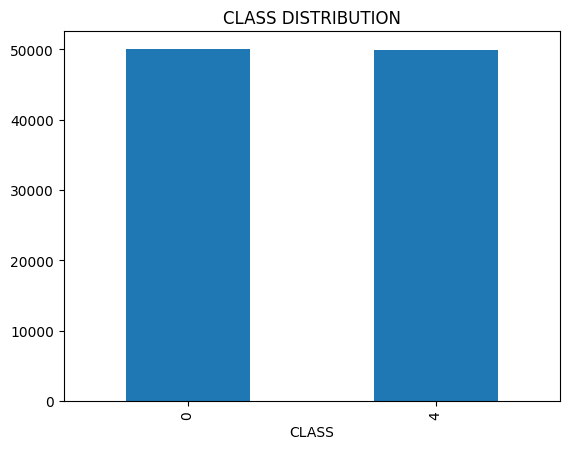

In [123]:
data.groupby('CLASS')['CLASS'].count().plot.bar()
plt.title('CLASS DISTRIBUTION')
plt.show()

In [124]:
data['CLASS'].unique()

array([4, 0])

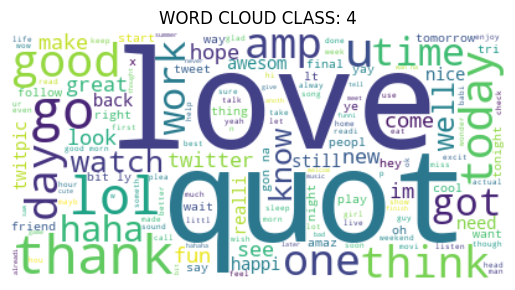

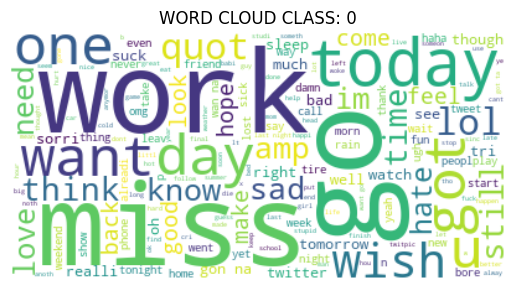

In [125]:
for value in data['CLASS'].unique():
    text = ' '.join(x for x in data[data['CLASS'] == value]['TEXT'])
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'WORD CLOUD CLASS: {value}')
    plt.show()